In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the CPU Usage of Broker-1
df1b = pd.read_csv("Brok1cpu_usage.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-08-13 18:15:50,339.194805,my-cluster-metrics-kafka-0
1,2021-08-13 18:16:05,341.408701,my-cluster-metrics-kafka-0
2,2021-08-13 18:16:16,342.558063,my-cluster-metrics-kafka-0


In [2]:
#Average CPU Usage before rebalancing
cpubr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:15:50') & (df1b['timestamp'] <= '2021-08-13 18:30:00')]
cpubr1.head(3)
cpubr1avg = cpubr1['values'].mean()
print(cpubr1avg)
cpubr1.describe()

404.2828493542372


,values
count,59.000000
mean,404.282849
std,39.847312
min,339.194805
25%,371.801174
50%,401.859193
75%,438.256121
max,473.326776


In [3]:
#Average CPU Usage During rebalancing
cpudr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:31:00') & (df1b['timestamp'] <= '2021-08-13 18:43:00')]
cpudr1.head(3)
cpudr1avg = cpudr1['values'].mean()
print(cpudr1avg)
cpudr1.describe()

556.783560544681


,values
count,47.000000
mean,556.783561
std,40.077300
min,484.845650
25%,524.382152
50%,561.496573
75%,591.894383
max,619.973077


In [4]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1cpu = ttest_ind(cpudr1['values'], cpubr1['values'])
print(resb1cpu)

Ttest_indResult(statistic=19.524763371793075, pvalue=1.4479062264735139e-36)


In [5]:
cpubr1.drop(['pod'], axis=1, inplace=True)
cpubr1.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  59 non-null     datetime64[ns]
 1   values     59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
cpudr1.drop(['pod'], axis=1, inplace=True)
cpudr1.head(10)
cpudr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 63 to 109
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  47 non-null     datetime64[ns]
 1   values     47 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Broker1 CPU Usage')

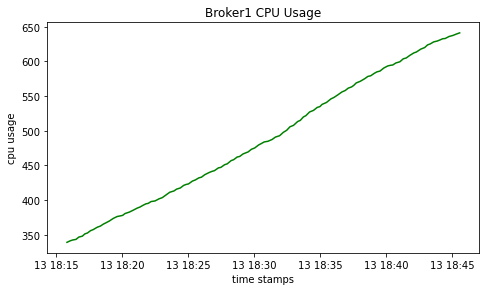

In [7]:
from datetime import datetime
#CPU Usage for the entire load test
c1=[]
for dat in df1b.timestamp:
    # print (dat)
    c1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(c1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('cpu usage')
axe1.set_title('Broker1 CPU Usage')
#fig1.tight_layout()

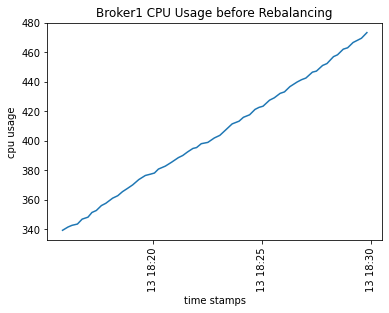

In [8]:
#CPU Usage before rebalancing
b1=[]
for dat in cpubr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,cpubr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage before Rebalancing')
plt.show()

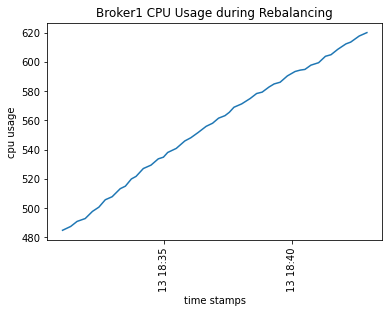

In [9]:
#CPU Usage during rebalancing
d1=[]
for dat in cpudr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,cpudr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage during Rebalancing')
plt.show()

In [10]:
# DA on the CPU Usage of Broker-2
df2b = pd.read_csv("Brok2cpu_usage.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-08-13 18:16:28,332.303844,my-cluster-metrics-kafka-1
1,2021-08-13 18:16:42,333.526599,my-cluster-metrics-kafka-1
2,2021-08-13 18:17:01,337.548307,my-cluster-metrics-kafka-1


In [11]:
#Average CPU Usage before rebalancing
cpubr2 = df2b[(df1b['timestamp'] >= '2021-08-13 18:16:28') & (df2b['timestamp'] <= '2021-08-13 18:30:00')]
cpubr2.head(3)
cpubr2avg = cpubr2['values'].mean()
print(cpubr2avg)
cpubr2.describe()

400.31292188979586


<ipython-input-11-3a86541309c3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cpubr2 = df2b[(df1b['timestamp'] >= '2021-08-13 18:16:28') & (df2b['timestamp'] <= '2021-08-13 18:30:00')]


,values
count,49.000000
mean,400.312922
std,33.999896
min,339.871940
25%,372.511837
50%,398.359019
75%,426.913213
max,461.869229


In [12]:
#Average CPU Usage During rebalancing
cpudr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:31:00') & (df2b['timestamp'] <= '2021-08-13 18:43:00')]
cpudr2.head(3)
cpudr2avg = cpudr2['values'].mean()
print(cpudr2avg)
cpudr2.describe()

536.4459599470589


,values
count,51.000000
mean,536.445960
std,38.101106
min,471.045226
25%,504.393769
50%,539.234273
75%,568.651778
max,598.495191


In [13]:
#T-Stats Analysis
resb2cpu = ttest_ind(cpudr2['values'], cpubr2['values'])
print(resb2cpu)

Ttest_indResult(statistic=18.824869288194172, pvalue=2.556567154128696e-34)


In [14]:
cpubr2.drop(['pod'], axis=1, inplace=True)
cpubr2.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  59 non-null     datetime64[ns]
 1   values     59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
cpudr2.drop(['pod'], axis=1, inplace=True)
cpudr2.head(10)
cpudr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 55 to 105
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  51 non-null     datetime64[ns]
 1   values     51 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


Text(0.5, 1.0, 'Broker2 CPU Usage')

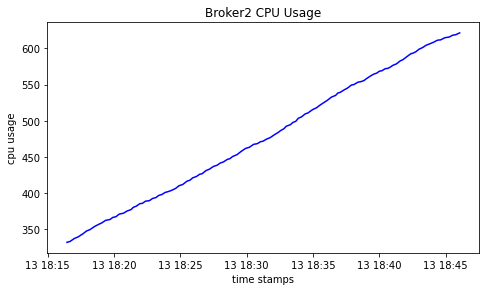

In [16]:
from datetime import datetime
#CPU Usage for the entire load test
c2=[]
for dat in df2b.timestamp:
    # print (dat)
    c2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(c2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('cpu usage')
axe2.set_title('Broker2 CPU Usage')
#fig1.tight_layout()

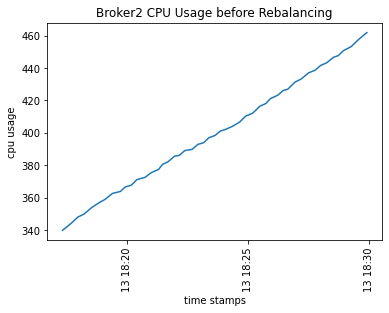

In [17]:
#CPU Usage before rebalancing
b2=[]
for dat in cpubr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,cpubr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage before Rebalancing')
plt.show()

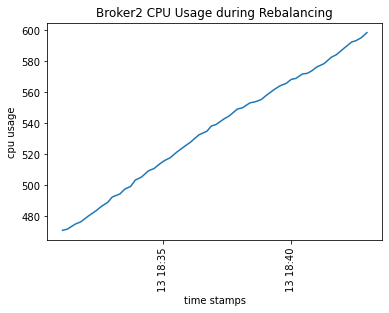

In [18]:
#CPU Usage during rebalancing
d2=[]
for dat in cpudr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,cpudr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage during Rebalancing')
plt.show()

In [19]:
# DA on the CPU Usage of Broker-3
df3b = pd.read_csv("Brok3cpu_usage.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-08-13 18:16:54,337.310049,my-cluster-metrics-kafka-2
1,2021-08-13 18:17:11,340.874037,my-cluster-metrics-kafka-2
2,2021-08-13 18:17:25,341.942100,my-cluster-metrics-kafka-2


In [20]:
#Average CPU Usage before rebalancing
cpubr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:16:54') & (df3b['timestamp'] <= '2021-08-13 18:30:00')]
cpubr3.head(3)
cpubr3avg = cpubr3['values'].mean()
print(cpubr3avg)
cpubr3.describe()

397.8216494283019


,values
count,53.000000
mean,397.821649
std,36.735854
min,337.310049
25%,367.670253
50%,393.638170
75%,429.126452
max,462.822396


In [21]:
#Average CPU Usage During rebalancing
cpudr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:31:00') & (df3b['timestamp'] <= '2021-08-13 18:43:00')]
cpudr3.head(3)
cpudr3avg = cpudr3['values'].mean()
print(cpudr3avg)
cpudr3.describe()

541.6652986173914


,values
count,46.000000
mean,541.665299
std,38.827677
min,473.493682
25%,506.659711
50%,546.423426
75%,574.916422
max,600.206412


In [22]:
#T-Stats Analysis
resb3cpu = ttest_ind(cpudr3['values'], cpubr3['values'])
print(resb1cpu)

Ttest_indResult(statistic=19.524763371793075, pvalue=1.4479062264735139e-36)


In [23]:
cpubr3.drop(['pod'], axis=1, inplace=True)
cpubr3.head(10)
cpubr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  53 non-null     datetime64[ns]
 1   values     53 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
cpudr3.drop(['pod'], axis=1, inplace=True)
cpudr3.head(10)
cpudr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 57 to 102
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  46 non-null     datetime64[ns]
 1   values     46 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Broker3 CPU Usage')

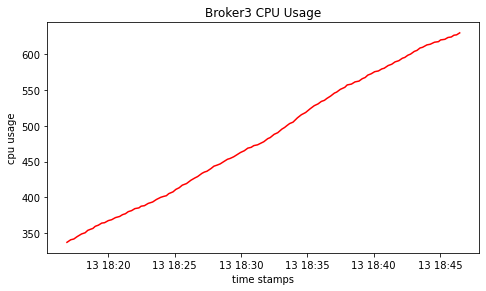

In [25]:
from datetime import datetime
#CPU Usage for the entire load test
c3=[]
for dat in df3b.timestamp:
    # print (dat)
    c3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(c3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('cpu usage')
axe3.set_title('Broker3 CPU Usage')
#fig1.tight_layout()

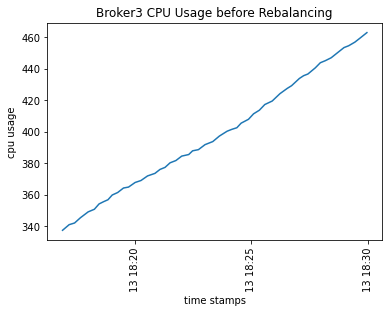

In [26]:
#CPU Usage before rebalancing
b3=[]
for dat in cpubr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,cpubr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage before Rebalancing')
plt.show()

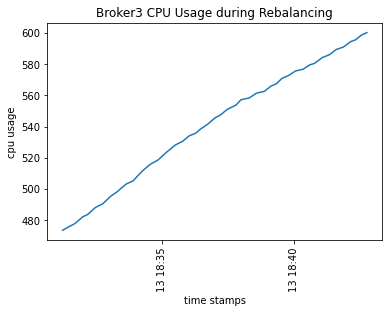

In [27]:
#CPU Usage during rebalancing
d3=[]
for dat in cpudr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,cpudr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage during Rebalancing')
plt.show()

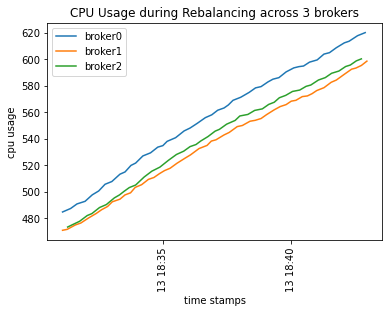

In [28]:
plt.plot(d1,cpudr1['values'])
plt.plot(d2,cpudr2['values'])
plt.plot(d3,cpudr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('CPU Usage during Rebalancing across 3 brokers')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()

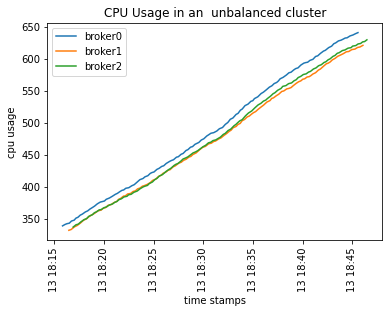

In [31]:
plt.plot(c1,df1b['values'])
plt.plot(c2,df2b['values'])
plt.plot(c3,df3b['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('CPU Usage in an  unbalanced cluster')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()